# Pymaceuticals Inc.
---

### Analysis



 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_metadata_results = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")

# # Display the data table for preview
mouse_metadata_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_number = mouse_metadata_results["Mouse ID"].nunique()
mice_number

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
x = mouse_metadata_results.duplicated(subset=['Mouse ID', 'Timepoint'])
dup_mice_id = mouse_metadata_results.loc[(x), "Mouse ID"].unique()
dup_mice_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_id_df = mouse_metadata_results.loc[ mouse_metadata_results["Mouse ID"] == "g989", :]
dup_mouse_id_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# clean_df = mouse_metadata_results.drop_duplicates(["Mouse ID"])
clean_df = mouse_metadata_results[mouse_metadata_results['Mouse ID'].isin(dup_mice_id)==False]
clean_df.head()
             


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
# mice_num_clean_df = len(clean_df["Mouse ID"])
# mice_num_clean_df
clean_mice=clean_df["Mouse ID"].value_counts()
mice_total=len(clean_mice)
mice_total

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
reg_mean = mouse_metadata_results.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
reg_median = mouse_metadata_results.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
reg_var = mouse_metadata_results.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
reg_std = mouse_metadata_results.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
reg_sem = mouse_metadata_results.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]

summary_stats_table = pd.DataFrame({"Mean Tumor Volume": reg_mean, 
                                    "Median Tumor Volume":reg_median, 
                                    "Tumor Volume Variance":reg_var, 
                                    "Tumor Volume Std. Dev.": reg_std, 
                                    "Tumor Volume Std. Err.": reg_sem})

summary_stats_table





,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
summary_df = pd.DataFrame({"Mean": reg_mean, 
                                    "Median":reg_median, 
                                    "Variance":reg_var, 
                                    "Std Dev": reg_std, 
                                    "SEM": reg_sem})

summary_df


# Using the aggregation method, produce the same summary statistics in a single line.
single=summary_df["Mean"].aggregate('mean')



## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

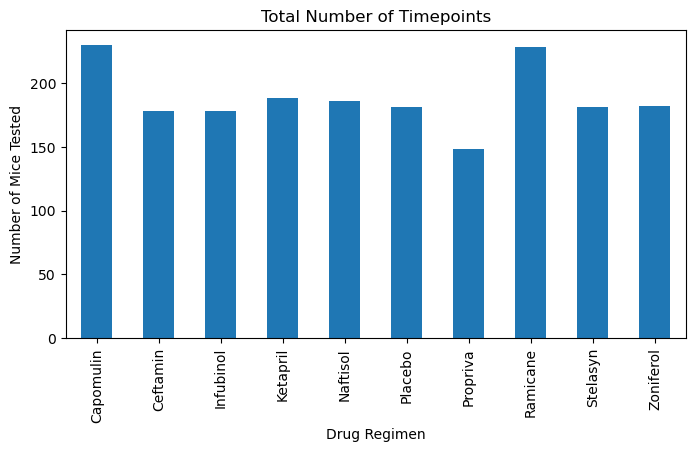

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

mice_total = clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
mice_total.plot(kind="bar", figsize=(8,4))
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Total Number of Timepoints")
plt.show

Text(0.5, 1.0, 'Total Number of Timepoints')

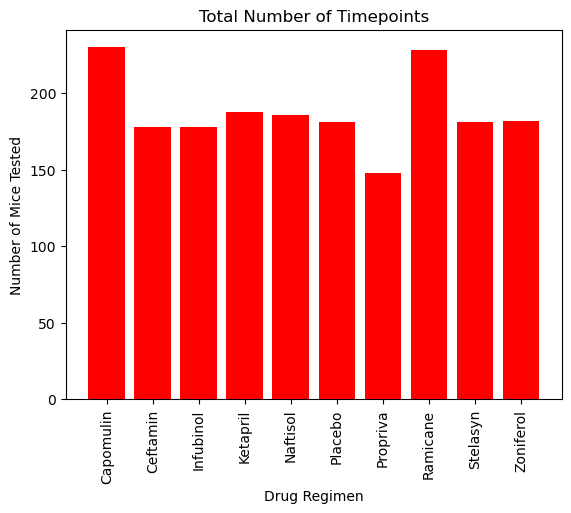

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = mice_total.index.values
y_axis = mice_total.values
plt.bar(x_axis, y_axis, color='red', align='center')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical")
plt.title("Total Number of Timepoints")



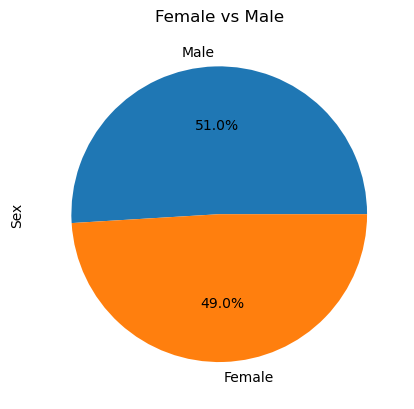

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_df["Sex"].value_counts()
gender_data.plot.pie(autopct= "%1.1f%%")
plt.title("Female vs Male")
plt.show()



Text(0.5, 1.0, 'Female vs Male')

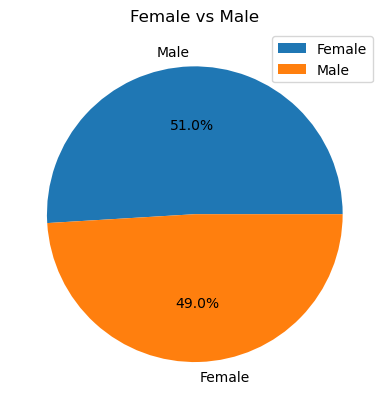

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_data,  labels=gender_data.index.values, autopct="%1.1f%%")
plt.legend(["Female", "Male"])
plt.title('Female vs Male')


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby(["Mouse ID"])["Timepoint"].max()
last_timepoint = last_timepoint.reset_index()
# # Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_vol_lastpoint = last_timepoint.merge(clean_df, on = ["Mouse ID", "Timepoint"], how = "left")
tumor_vol_lastpoint

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
     tumor_vol = tumor_vol_lastpoint.loc[tumor_vol_lastpoint["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
     tumor_vol_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
     quartiles = tumor_vol.quantile([.25, .5, .75])
     lowerq = quartiles[.25]
     upperq = quartiles[.75]
     iqr = upperq - lowerq 
    
     lower_bound = lowerq - (1.5*iqr)
     upper_bound = upperq + (1.5*iqr)
     outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
     print(f"For {drug}, the outliers are: {outliers}")

For Capomulin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Ramicane, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Infubinol, the outliers are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
For Ceftamin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


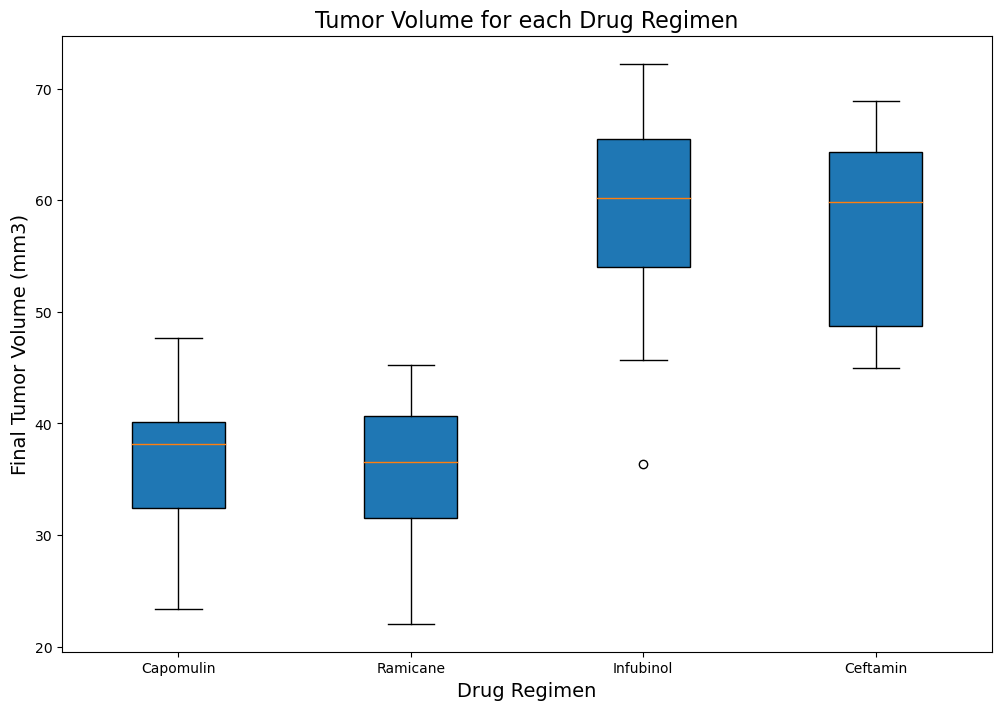

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.set_title('Tumor Volume for each Drug Regimen',fontsize =16)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Drug Regimen',fontsize = 14)
ax1.boxplot(tumor_vol_data, labels=treatments, widths = 0.4, patch_artist=True,vert=True)

plt.show()

## Line and Scatter Plots

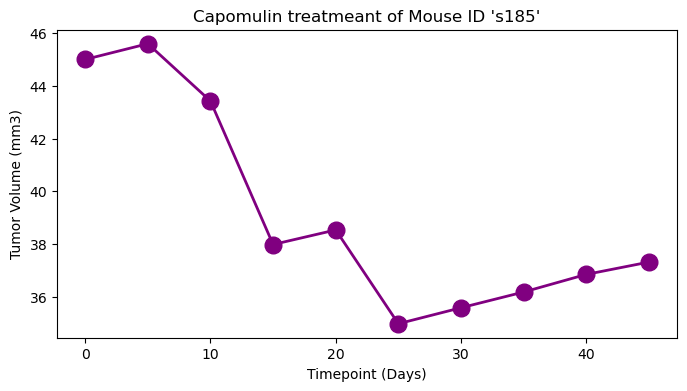

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]

mouse_in_capomulin = capomulin_df.loc[capomulin_df["Mouse ID"] == "i738",:]
mouse_in_capomulin
x_axis = mouse_in_capomulin["Timepoint"]
tumor_vol = mouse_in_capomulin["Tumor Volume (mm3)"]
fig1, ax1 = plt.subplots(figsize=(8, 4))
plt.title("Capomulin treatmeant of Mouse ID 's185'",fontsize =12)
plt.plot(x_axis, tumor_vol,linewidth=2, markersize=12,marker="o",color="purple", label="mm3")
plt.xlabel("Timepoint (Days)",fontsize =10)
plt.ylabel("Tumor Volume (mm3)",fontsize =10)

# plt.savefig("./Images/mouse_Capomulin_line_plot.png", bbox_inches = "tight")
plt.show()

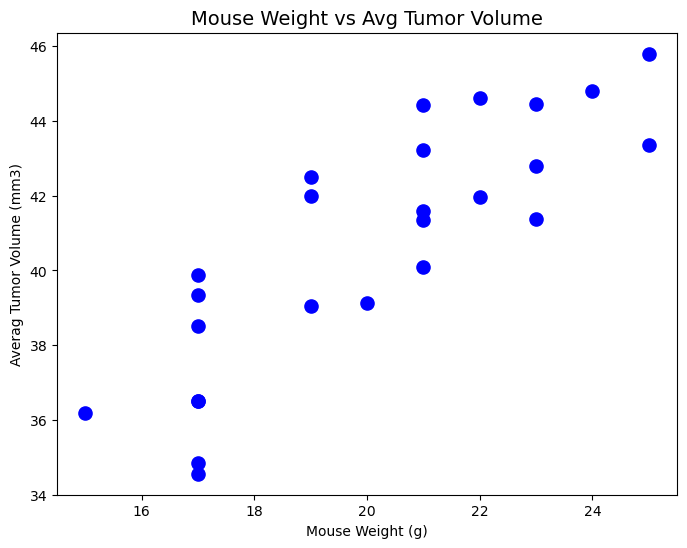

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

avg_cap_df = capomulin_df.groupby(['Mouse ID']).mean()
fig1, ax1 = plt.subplots(figsize=(8, 6))
marker_size=10
plt.scatter(avg_cap_df['Weight (g)'],avg_cap_df['Tumor Volume (mm3)'],s=90, color="blue")
plt.title("Mouse Weight vs Avg Tumor Volume",fontsize =14)
plt.xlabel("Mouse Weight (g)",fontsize =10)
plt.ylabel("Averag Tumor Volume (mm3)",fontsize =10)
plt.show()


## Correlation and Regression

The correlation between mouse weight and average tumor volume is: 0.84


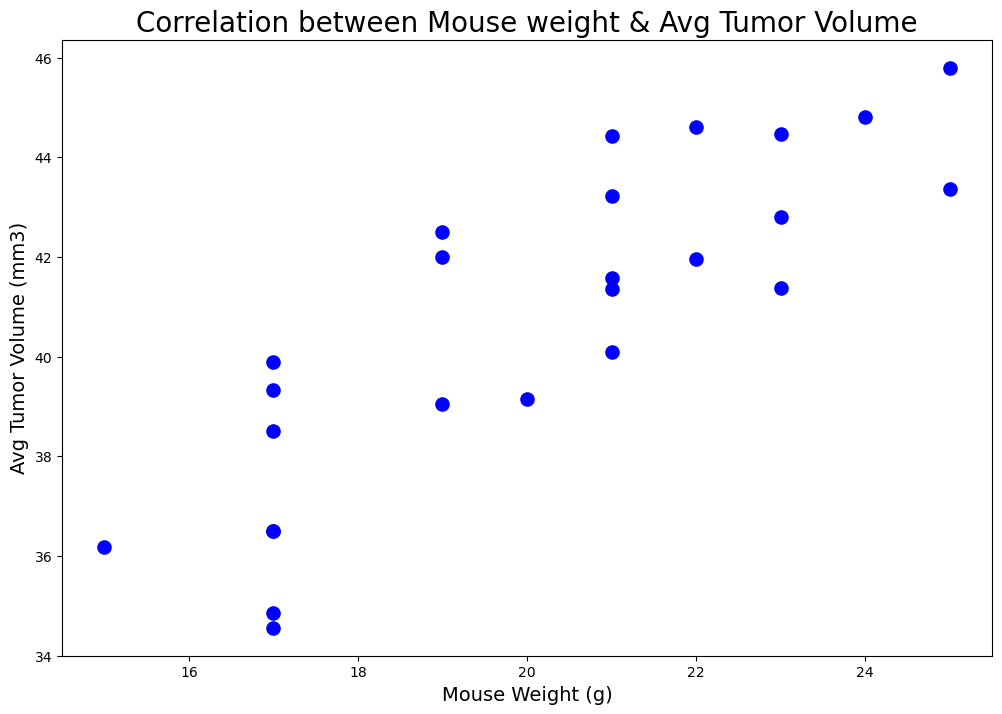

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = round(st.pearsonr(avg_cap_df['Weight (g)'],avg_cap_df['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is: {correlation}")

fig1, ax1 = plt.subplots(figsize=(12, 8))
plt.scatter(avg_cap_df['Weight (g)'],avg_cap_df['Tumor Volume (mm3)'],s=90, color="blue")
plt.title("Correlation between Mouse weight & Avg Tumor Volume",fontsize =20)
plt.xlabel("Mouse Weight (g)", fontsize = 14)
plt.ylabel("Avg Tumor Volume (mm3)", fontsize = 14)
plt.show()